### Get the Data

In [ ]:
from google.colab import files
files.upload()  # Upload the kaggle.json file

In [ ]:
import os
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d atharvaingle/crop-recommendation-dataset

Dataset URL: https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset
License(s): apache-2.0


In [ ]:
import zipfile

# Extract dataset
!unzip crop-recommendation-dataset.zip -d dataset/

Archive:  crop-recommendation-dataset.zip
replace dataset/Crop_recommendation.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


### Know the Data

In [ ]:
import pandas as pd

# Replace 'your_file_name.xls' with the actual uploaded file name
df = pd.read_csv('/content/dataset/Crop_recommendation.csv')

# Display the first few rows of the DataFrame
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


### Check for Null

In [ ]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


### Class Distribution

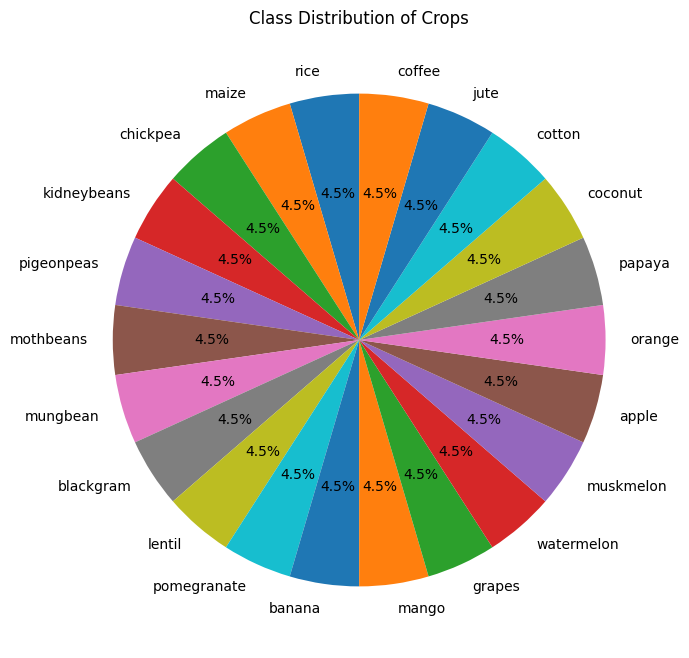

In [ ]:
import matplotlib.pyplot as plt

# Get the count of each crop
crop_counts = df['label'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(crop_counts, labels=crop_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Class Distribution of Crops")
plt.show()

### Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [ ]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,5


### Correlation

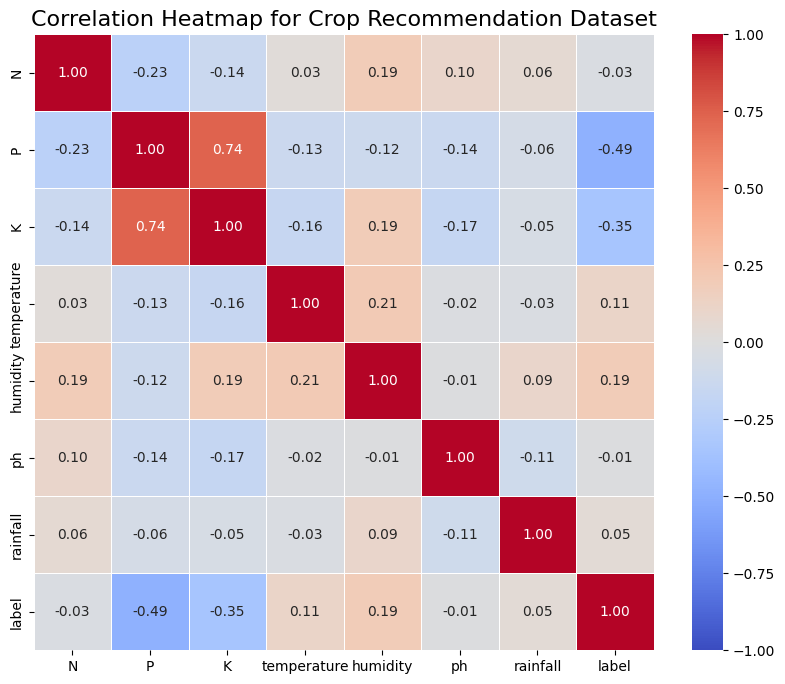

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(
    corr_matrix,  # Correlation matrix
    annot=True,  # Annotate the heatmap with correlation values
    fmt=".2f",  # Format the annotations to 2 decimal places
    cmap="coolwarm",  # Color map (e.g., "coolwarm", "viridis", "plasma")
    linewidths=0.5,  # Add lines between cells
    vmin=-1,  # Minimum value for the color scale
    vmax=1  # Maximum value for the color scale
)

# Add a title
plt.title("Correlation Heatmap for Crop Recommendation Dataset", fontsize=16)

# Show the plot
plt.show()


**Model Improvement:**

*     Since rainfall, ph, and N have weak correlations with the target (label), you might investigate whether these features are necessary for your model or if they can be removed.



**Domain Knowledge Validation:**

*   Validate these insights with agricultural knowledge. For example:

*   Are there crops that are known to prefer lower phosphorus or potassium levels?

*   Does the weak correlation between rainfall and label align with real-world observations?

### Dependent and Independent Split

In [ ]:
x = df.drop(columns=['label'])
y = df['label']

In [ ]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [ ]:
y

,label
0,20
1,20
2,20
3,20
4,20
...,...
2195,5
2196,5
2197,5
2198,5


### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training & testing sets (80-20 split)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1760 entries, 1656 to 860
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1760 non-null   int64  
 1   P            1760 non-null   int64  
 2   K            1760 non-null   int64  
 3   temperature  1760 non-null   float64
 4   humidity     1760 non-null   float64
 5   ph           1760 non-null   float64
 6   rainfall     1760 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 110.0 KB


In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 1760 entries, 1656 to 860
Series name: label
Non-Null Count  Dtype
--------------  -----
1760 non-null   int64
dtypes: int64(1)
memory usage: 27.5 KB


In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 1451 to 482
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            440 non-null    int64  
 1   P            440 non-null    int64  
 2   K            440 non-null    int64  
 3   temperature  440 non-null    float64
 4   humidity     440 non-null    float64
 5   ph           440 non-null    float64
 6   rainfall     440 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 27.5 KB


In [ ]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 440 entries, 1451 to 482
Series name: label
Non-Null Count  Dtype
--------------  -----
440 non-null    int64
dtypes: int64(1)
memory usage: 6.9 KB


### Training

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Choose a model
model = RandomForestClassifier(n_estimators=92)
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)


# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print metrics
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")


#### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(x_train, y_train)
gb_preds = gb.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, gb_preds)
precision = precision_score(y_test, gb_preds, average='weighted')
recall = recall_score(y_test, gb_preds, average='weighted')
f1 = f1_score(y_test, gb_preds, average='weighted')

# Print metrics
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

Model Accuracy: 98.18%
Precision: 98.43%
Recall: 98.18%
F1 Score: 98.19%


#### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm = SVC(probability=True, random_state=42)
svm.fit(x_train, y_train)
svm_preds = svm.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, svm_preds)
precision = precision_score(y_test, svm_preds, average='weighted')
recall = recall_score(y_test, svm_preds, average='weighted')
f1 = f1_score(y_test, svm_preds, average='weighted')

# Print metrics
print(f"SVM Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

SVM Accuracy: 96.14%
Precision: 96.73%
Recall: 96.14%
F1 Score: 96.12%


#### Logestic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000, random_state=42)
lr.fit(x_train, y_train)
lr_preds = lr.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, lr_preds)
precision = precision_score(y_test, lr_preds, average='weighted')
recall = recall_score(y_test, lr_preds, average='weighted')
f1 = f1_score(y_test, lr_preds, average='weighted')

# Print metrics
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

Logistic Regression Accuracy: 97.50%
Precision: 97.52%
Recall: 97.50%
F1 Score: 97.49%


#### Stacking of Ensembles

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Base learners
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
]

# Meta learner
meta_model = LogisticRegression(max_iter=1000)

# Stacking classifier
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,  # Cross-validation on training set for meta features
    passthrough=False  # If True, it also passes original features to meta-model
)

# Train
stacked_model.fit(x_train, y_train)

# Predict
y_pred = stacked_model.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print metrics
print(f"Stacking Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

Stacking Accuracy: 99.09%
Precision: 99.16%
Recall: 99.09%
F1 Score: 99.09%


#### Save the model

we need to save both the model and the encoder so that while predicting the model gives the label num and we need to get the label of that num using the encoder saved

In [ ]:
import pickle

# Assume your model is trained and saved in the variable 'stacked_model'
with open('stacked_model.pkl', 'wb') as f:
    pickle.dump(stacked_model, f)

In [ ]:
from google.colab import files
files.download('stacked_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save label encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

In [ ]:
# Load label encoder
with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

In [ ]:
from google.colab import files
files.download('label_encoder.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Classification Report

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
    

#### Confusion Matrix

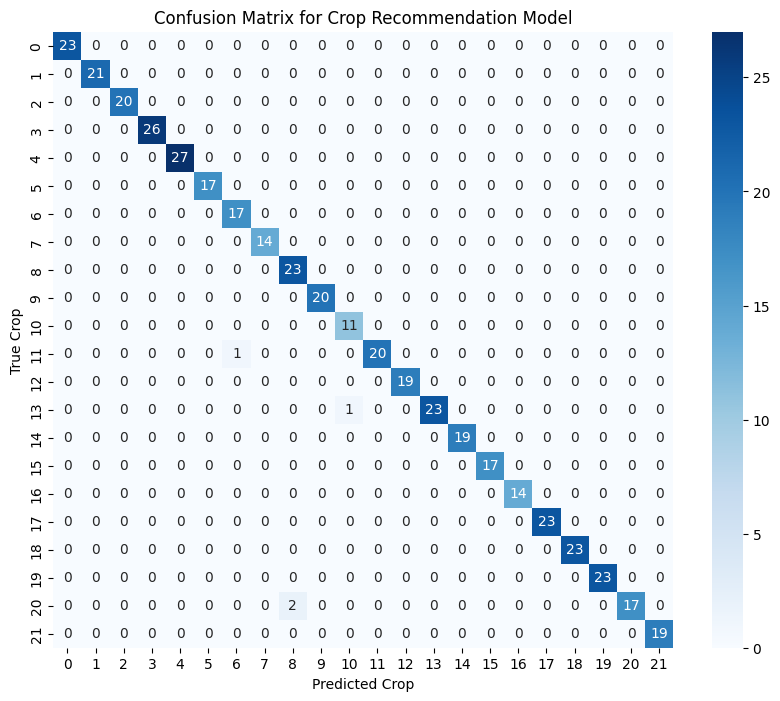

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    conf_matrix,
    annot=True,  # Add numbers to the cells
    fmt="d",  # Format as integers
    cmap="Blues",  # Color map
    xticklabels=model.classes_,  # Class names on x-axis
    yticklabels=model.classes_  # Class names on y-axis
)
plt.title("Confusion Matrix for Crop Recommendation Model")
plt.xlabel("Predicted Crop")
plt.ylabel("True Crop")
plt.show()

#### Normalized Confusion Matrix

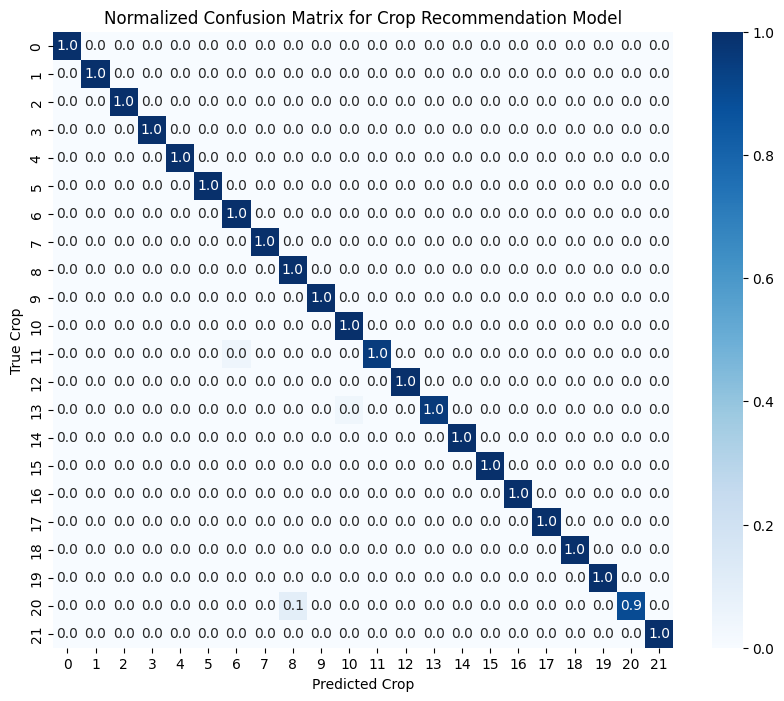

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt=".1f", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Normalized Confusion Matrix for Crop Recommendation Model")
plt.xlabel("Predicted Crop")
plt.ylabel("True Crop")
plt.show()

### Test Random Sample

In [ ]:
import pickle
import numpy as np
import random

# Load model
with open('stacked_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Load label encoder
with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

# Randomly generate sample inputs
# Assuming feature order: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

sample_input = [
    random.uniform(0, 150),    # N
    random.uniform(0, 150),    # P
    random.uniform(0, 150),    # K
    random.uniform(10, 40),    # temperature (°C)
    random.uniform(20, 90),    # humidity (%)
    random.uniform(3.5, 9.5),  # pH
    random.uniform(0, 300)     # rainfall (mm)
]

print("Sample Input Values:")
print(f"N: {sample_input[0]:.2f}, P: {sample_input[1]:.2f}, K: {sample_input[2]:.2f},")
print(f"Temperature: {sample_input[3]:.2f}°C, Humidity: {sample_input[4]:.2f}%, pH: {sample_input[5]:.2f}, Rainfall: {sample_input[6]:.2f}mm")

# Convert to model input format
input_array = np.array([sample_input])

# Predict
pred_encoded = model.predict(input_array)
predicted_crop = label_encoder.inverse_transform(pred_encoded)[0]

print("\n✅ Predicted Recommended Crop:", predicted_crop)

Sample Input Values:
N: 83.64, P: 83.69, K: 95.30,
Temperature: 21.02°C, Humidity: 61.61%, pH: 5.15, Rainfall: 222.07mm

✅ Predicted Recommended Crop: coffee


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
